<a href="https://colab.research.google.com/github/joon-11/learn_AI/blob/main/1_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

bank_df = pd.read_csv('bank.csv', sep = ',')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [ ]:
print(bank_df.shape) # 행수, 열수

(7234, 17)


In [ ]:
print(bank_df.dtypes) # 데이터 타입

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [ ]:
print(bank_df.isnull().any(axis=1)) # 결손값 확인(행방향)
print(bank_df.isnull().any(axis=0)) # 결손값 확인(열방향)

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [ ]:
print(bank_df.isnull().sum(axis=1)) # 결손수 확인(행방향)
print(bank_df.isnull().sum(axis=0)) # 결손수 확인(열방향)

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [ ]:
bank_df.describe() # 통계량 계산
# 25,50(중앙치),75 = 사분위값(데이터를 오름차순으로 정렬했을때 4개로 분할한 경계값),쓸모없는 데이터를 걸러내기 위해 함

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


<function matplotlib.pyplot.show(close=None, block=None)>

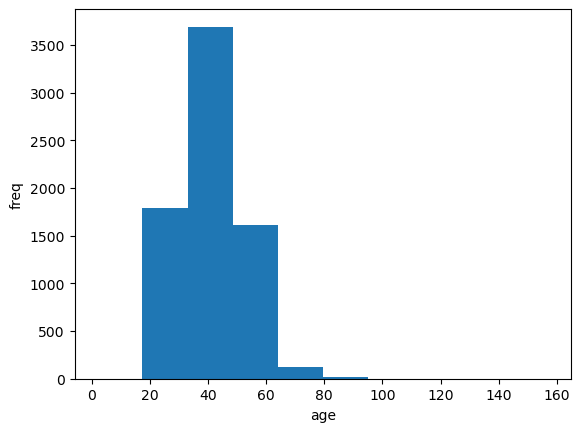

In [ ]:
# age 의 히스토그램
import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(bank_df['age'])
plt.xlabel('age')
plt.ylabel('freq')
plt.show

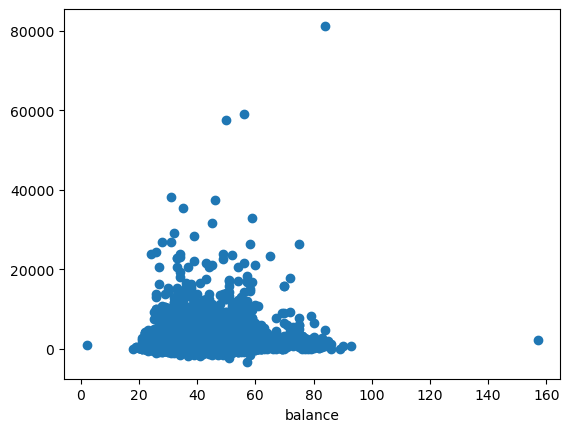

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [ ]:
# age 와 balance의 산포도, 상관계수 
plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.xlabel('balance')
plt.show()

bank_df[['age', 'balance']].corr() # 상관계수는 0.112364, 거의 무관계에 가까움(1(비례) 이나 -1(반비례) 에 가까울수록 상관관계 있음)

In [ ]:
# 직업별 발생횟수(비율)
print(bank_df['job'].value_counts(ascending = False, normalize = True))

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


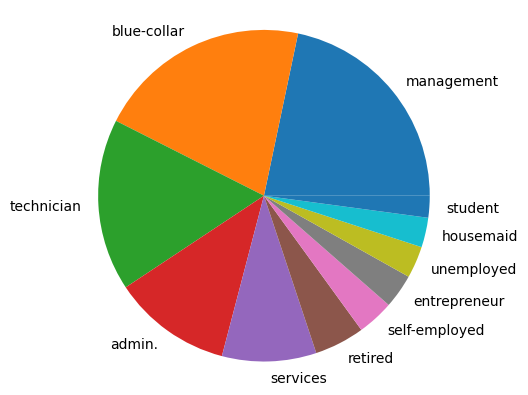

In [ ]:
# job 의 원그래프 
job_label = bank_df['job'].value_counts(ascending = False, normalize = True).index
job_vals = bank_df['job'].value_counts(ascending = False, normalize = True).values

plt.pie(job_vals, labels = job_label)
plt.axis('equal')
plt.show()

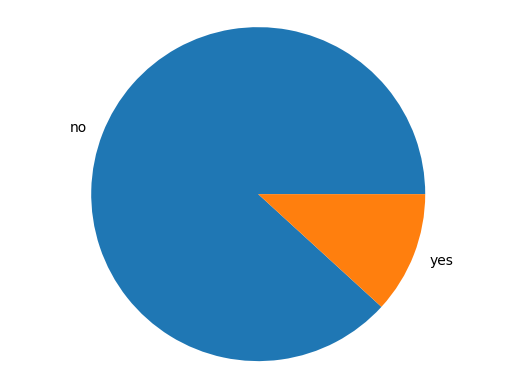

In [ ]:
# y,n (예금신청결과) 원그래프 = 목적변수
y_label = bank_df['y'].value_counts(ascending = False, normalize = True).index
y_vals = bank_df['y'].value_counts(ascending = False, normalize = True).values

plt.pie(y_vals, labels = y_label)
plt.axis('equal')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

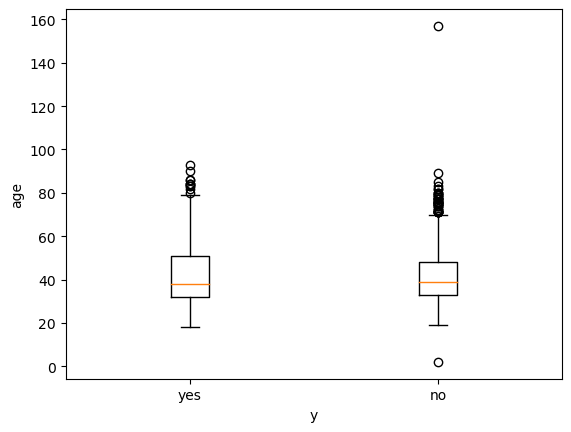

In [ ]:
#목적변수 y 에 대한 데이터 분포 확인
#상자수염그림 (박스의 범위는 사분위의 범위)
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == 'no']
y_age = [y_yes['age'], y_no['age']]

plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
plt.setp(ax, xticklabels = ['yes', 'no'])
plt.show